<h5 style="color:#BDFF7A"> 로지스틱 회귀</h5>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/LogisticRegressionData.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
X.shape, y.shape

((20, 1), (20,))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
len(X_train), len(X_test)

(16, 4)

In [7]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [9]:
reg.predict([[6],[8],[2]])

array([1, 1, 0], dtype=int64)

In [10]:
reg.predict_proba([[6]]) #확률 값(불합격 / 합격)

array([[0.14150735, 0.85849265]])

In [13]:
y_pred = reg.predict(X_test)
y_pred, X_test

(array([1, 0, 1, 1], dtype=int64),
 array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]))

In [14]:
reg.score(X_test, y_test)

0.75

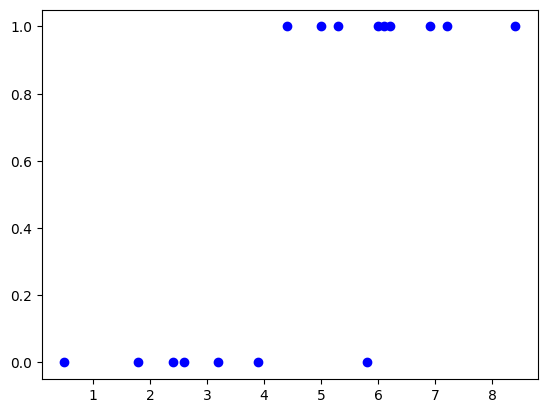

In [15]:
plt.scatter(X_train, y_train, color='blue')
plt.show()

In [17]:
X_range = np.arange(min(X), max(X), 0.1) #0.1단위로
X_range

C:\Users\eu_un\AppData\Local\Temp\ipykernel_4512\195679147.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1) #0.1단위로


array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [21]:
# P = 1 / 1 + (e^-y)
# y = mx + b
m = reg.coef_ #coef_ : 기울기
b = reg.intercept_ #intercept_ : y절편
y = m * X_range + b 
P = 1 / (1 + (np.exp(-y)))
P = P.reshape(-1)

<function matplotlib.pyplot.show(close=None, block=None)>

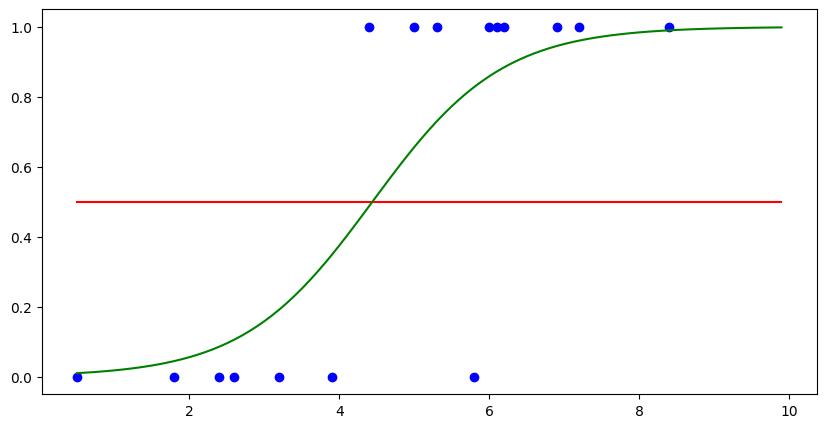

In [24]:
plt.figure(figsize=(10, 5), dpi=100)
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red')
plt.plot(X_range, P, color='green')
plt.show

In [25]:
def sigmoid(reg, x):
    m = reg.coef_ #coef_ : 기울기
    b = reg.intercept_ #intercept_ : y절편
    y = m * X_range + b 
    P = 1 / (1 + (np.exp(-y)))
    P = P.reshape(-1)
    return P

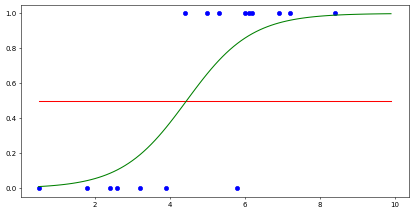

In [31]:
plt.figure(figsize=(10, 5), dpi=50)
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red')
plt.plot(X_range, sigmoid(reg, X_range), color='green')
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
y_pred = reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 1],
       [0, 2]], dtype=int64)

In [30]:
y_pred = reg.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
cm

array([[6, 1],
       [1, 8]], dtype=int64)